Title: Data Science Project GiveMeSomeCredit 
Author: Mana Shahriari
Date created: 2021/11/28
Description: Demonstration of Dataset:GiveMeSomeCredit https://www.kaggle.com/c/GiveMeSomeCredit/data 

Introduction

This project provides a solution to
[Kaggle Give Me Some Credit](https://www.kaggle.com/c/GiveMeSomeCredit/data)
dataset and demonstrate how to solve it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Get the real data from https://www.kaggle.com/c/GiveMeSomeCredit/data
Alternatively you can use the Kaggle API to download the dataset using kaggle competitions download -c GiveMeSomeCredit

In [2]:
df = pd.read_csv('cs-training.csv')

Data Exploratory of the Whole Dataset

In [3]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
df.shape

(150000, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [7]:
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


Removing Unnamed: 0 Coloumn, doublicates indeces 

In [8]:
df.drop(columns='Unnamed: 0',inplace=True)

Data Exploratory of Target Class (SeriousDlqin2yrs)

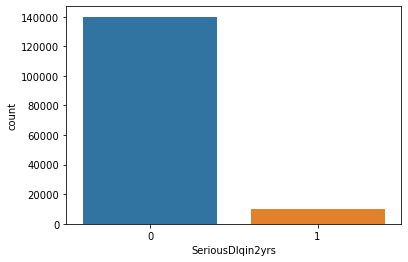

In [9]:
sns.countplot(x='SeriousDlqin2yrs',data=df)
plt.show()

In [10]:
df['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

Correlation of Target with Features

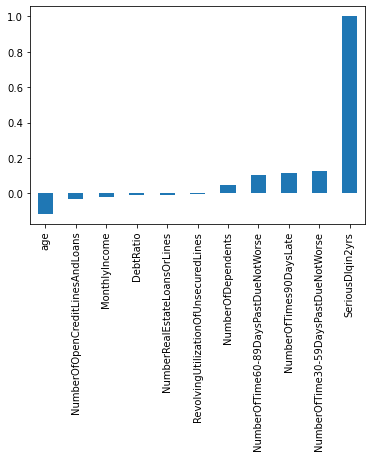

In [11]:
df.corr()['SeriousDlqin2yrs'].sort_values().plot(kind='bar')
plt.show()

Data Exploratory of Features

Processing Missing Data 

In [12]:
df.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [13]:
100* df.isnull().sum()/len(df)

SeriousDlqin2yrs                         0.000000
RevolvingUtilizationOfUnsecuredLines     0.000000
age                                      0.000000
NumberOfTime30-59DaysPastDueNotWorse     0.000000
DebtRatio                                0.000000
MonthlyIncome                           19.820667
NumberOfOpenCreditLinesAndLoans          0.000000
NumberOfTimes90DaysLate                  0.000000
NumberRealEstateLoansOrLines             0.000000
NumberOfTime60-89DaysPastDueNotWorse     0.000000
NumberOfDependents                       2.616000
dtype: float64

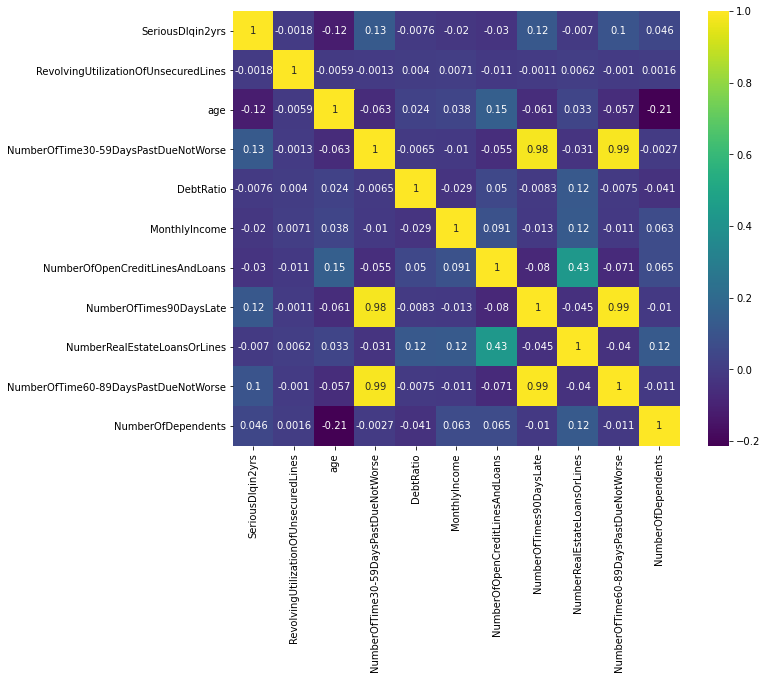

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap="viridis",annot=True)
plt.show()

In [15]:
df.corr()['MonthlyIncome'].sort_values()

DebtRatio                              -0.028712
SeriousDlqin2yrs                       -0.019746
NumberOfTimes90DaysLate                -0.012743
NumberOfTime60-89DaysPastDueNotWorse   -0.011116
NumberOfTime30-59DaysPastDueNotWorse   -0.010217
RevolvingUtilizationOfUnsecuredLines    0.007124
age                                     0.037717
NumberOfDependents                      0.062647
NumberOfOpenCreditLinesAndLoans         0.091455
NumberRealEstateLoansOrLines            0.124959
MonthlyIncome                           1.000000
Name: MonthlyIncome, dtype: float64

Filling NAN using Correlation of Missing Data with the Class withthe Highest Correlation  

In [16]:
MeanIncome = df.groupby('NumberRealEstateLoansOrLines').mean()['MonthlyIncome']

In [17]:
def fill_MeanIncome(NumberRealEstateLoansOrLines,MonthlyIncome):
    if np.isnan(MonthlyIncome):
        return MeanIncome[NumberRealEstateLoansOrLines]
    else:
        return MonthlyIncome    


In [18]:
df['MonthlyIncome'] = df.apply(lambda 
                               x: fill_MeanIncome(x['NumberRealEstateLoansOrLines'], x['MonthlyIncome']), axis=1)

Checking if NAN Values are Filled for df['MonthlyIncome']

In [19]:
df.isnull().sum()

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      3924
dtype: int64

Droping the rest NAN around 2% of the Total Numbers

In [20]:
df = df.dropna()
df.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

Data PreProcessing for Training

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [22]:
X = df.drop('SeriousDlqin2yrs',axis=1).values
y = df['SeriousDlqin2yrs'].values

Preparing Train and Validation Set

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

Normalizing Data Using Training Data Statistics

In [25]:
mean = np.mean(X_train, axis=0)
X_train -= mean
X_val -= mean
std = np.std(X_train, axis=0)
X_train /= std
X_val /= std

In [26]:
print("Number of training samples:", len(X_train))
print("Number of validation samples:", len(X_val))


Number of training samples: 116860
Number of validation samples: 29216


Analyze Class Imbalance in the Targets

In [27]:
negatives = 100 * df['SeriousDlqin2yrs'].value_counts()[0]/df['SeriousDlqin2yrs'].shape[-1]
positives = 100 * df['SeriousDlqin2yrs'].value_counts()[1]/df['SeriousDlqin2yrs'].shape[-1]
print(
    "Number of positive samples in training data: ({:.2f}% of total labels)".format(
        positives)
    )

Number of positive samples in training data: (6.74% of total labels)


Building the Model

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt

Define the Model

In [30]:
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[-1],),
                activation='relu', 
                kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))  
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                704       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


Train the model with class_weight Argument

In [31]:
model.compile(loss='binary_crossentropy', optimizer='sgd')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=10, patience=10, restore_best_weights=True)
# Negatives Labels are Roughly 12 Times the Positive Ones (We saw this earlier) 
weights = {0:1, 1:12}
model.fit(
    X_train,
    y_train,
    epochs=100,
    verbose=1,
    callbacks=[early_stop],
    validation_data=(X_val, y_val),
    class_weight=weights
)

Epoch 1/100
3652/3652 [==============================] - 4s 1ms/step - loss: 1.0884 - val_loss: 0.5880
Epoch 2/100
3652/3652 [==============================] - 4s 977us/step - loss: 1.0153 - val_loss: 0.4254
Epoch 3/100
3652/3652 [==============================] - 4s 977us/step - loss: 0.9694 - val_loss: 0.4810
Epoch 4/100
3652/3652 [==============================] - 3s 880us/step - loss: 0.9473 - val_loss: 0.4443
Epoch 5/100
3652/3652 [==============================] - 3s 886us/step - loss: 0.9282 - val_loss: 0.4208
Epoch 6/100
3652/3652 [==============================] - 3s 883us/step - loss: 0.9159 - val_loss: 0.4643
Epoch 7/100
3652/3652 [==============================] - 3s 885us/step - loss: 0.9138 - val_loss: 0.4160
Epoch 8/100
3652/3652 [==============================] - 3s 889us/step - loss: 0.9072 - val_loss: 0.4342
Epoch 9/100
3652/3652 [==============================] - 3s 886us/step - loss: 0.9020 - val_loss: 0.4455
Epoch 10/100
3652/3652 [==============================] -

Assessing the Model on Validation Set

In [32]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

In [33]:
predictions = (model.predict(X_val) > 0.5).astype("int32")
print(classification_report(y_val,predictions))
confusion_matrix(y_val,predictions)
score = roc_auc_score(y_val,predictions)
print('ROC AUC: %.3f' % score)

              precision    recall  f1-score   support

           0       0.97      0.87      0.92     27234
           1       0.26      0.63      0.37      1982

    accuracy                           0.86     29216
   macro avg       0.62      0.75      0.65     29216
weighted avg       0.92      0.86      0.88     29216

ROC AUC: 0.749


Saving the Model

In [34]:
from tensorflow.keras.models import load_model
model.save('GiveMeSomeCredit.h5')  

In [ ]:
def model_builder(hp):
    model = keras.Sequential()
    hp_units1 = hp.Int('units', min_value=32, max_value=128, step=32)
    model.add(Dense(units=hp_units1, input_shape=(X_train.shape[-1],), activation='relu'))
    model.add(keras.layers.Dense(10))
    #hp_activation = hp.Choice(name = 'activation', values = ['relu', 'elu', 'lrelu'], ordered = False)
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.BinaryCrossentropy())
    return model


In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective=kt.Objective('val_auc', direction='max'),
                     max_epochs=10,
                     factor=3,
                     directory='keras_tuner_dir',
                     project_name='keras_tuner_demo2')

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[stop_early])
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]


In [ ]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

In [ ]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(X_train,y_train, epochs=best_epoch, validation_split=0.1)
eval_result = hypermodel.evaluate(X_test,y_test)
print("[test loss, test accuracy]:", eval_result)

In [ ]:
tuner.results_summary()

In [ ]:
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]